# 01. Intro
Neste notebook estão as avaliações de conformidade dos modelos em BPMN descobertos com o software *Apromore* a partir do log de eventos. Os dois modelos que serão avaliados são: 

> 1. **Modelo A**: Modelo com todos os arcos;

> 2. **Modelo B**: Modelo abstraído contendo 25% dos arcos, baseado na frequência de _case_.

In [21]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

### 01.1 Leitura do log
Subindo o log em `.xes` com a lib `PM4PY`. Note que o log será lido como um dataframe, que será útil nas análises posteriores.

In [ ]:
event_log = pm4py.read_xes("../_datasets/01_TRAFFIC_FINE_MANAGEMENT.xes")

In [86]:
event_log

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola,start_timestamp
0,35.0,561,NIL,Create Fine,A,0.0,complete,2006-07-23 22:00:00+00:00,157.0,0.0,A1,NaN,NaN,NaN,NaN,NaN,2006-07-23 22:00:00+00:00
1,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-04 23:00:00+00:00,NaN,NaN,A1,11.00,NaN,NaN,NaN,NaN,2006-12-04 23:00:00+00:00
2,35.0,561,NIL,Create Fine,A,0.0,complete,2006-08-01 22:00:00+00:00,157.0,0.0,A100,NaN,NaN,NaN,NaN,NaN,2006-08-01 22:00:00+00:00
3,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2006-12-11 23:00:00+00:00,NaN,NaN,A100,11.00,NaN,NaN,NaN,NaN,2006-12-11 23:00:00+00:00
4,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2007-01-14 23:00:00+00:00,NaN,NaN,A100,NaN,P,P,NaN,NaN,2007-01-14 23:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,131.0,25,NIL,Create Fine,A,0.0,complete,2002-09-06 22:00:00+00:00,142.0,0.0,V9999,NaN,NaN,NaN,NaN,NaN,2002-09-06 22:00:00+00:00
561466,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2002-10-24 22:00:00+00:00,NaN,NaN,V9999,15.16,NaN,NaN,NaN,NaN,2002-10-24 22:00:00+00:00
561467,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2002-11-03 23:00:00+00:00,NaN,NaN,V9999,NaN,P,N,NaN,NaN,2002-11-03 23:00:00+00:00
561468,262.0,NaN,NaN,Add penalty,NaN,NaN,complete,2003-01-02 23:00:00+00:00,NaN,NaN,V9999,NaN,NaN,NaN,NaN,NaN,2003-01-02 23:00:00+00:00


### 01.2 Leitura dos modelos
Lendo os modelos em `.bpmn` com a lib `PM4PY`. Os modelos serão convertidos, também, para Petri Nets, para podermos analisar a métrica de fitness pela estratégia do Token Replay.

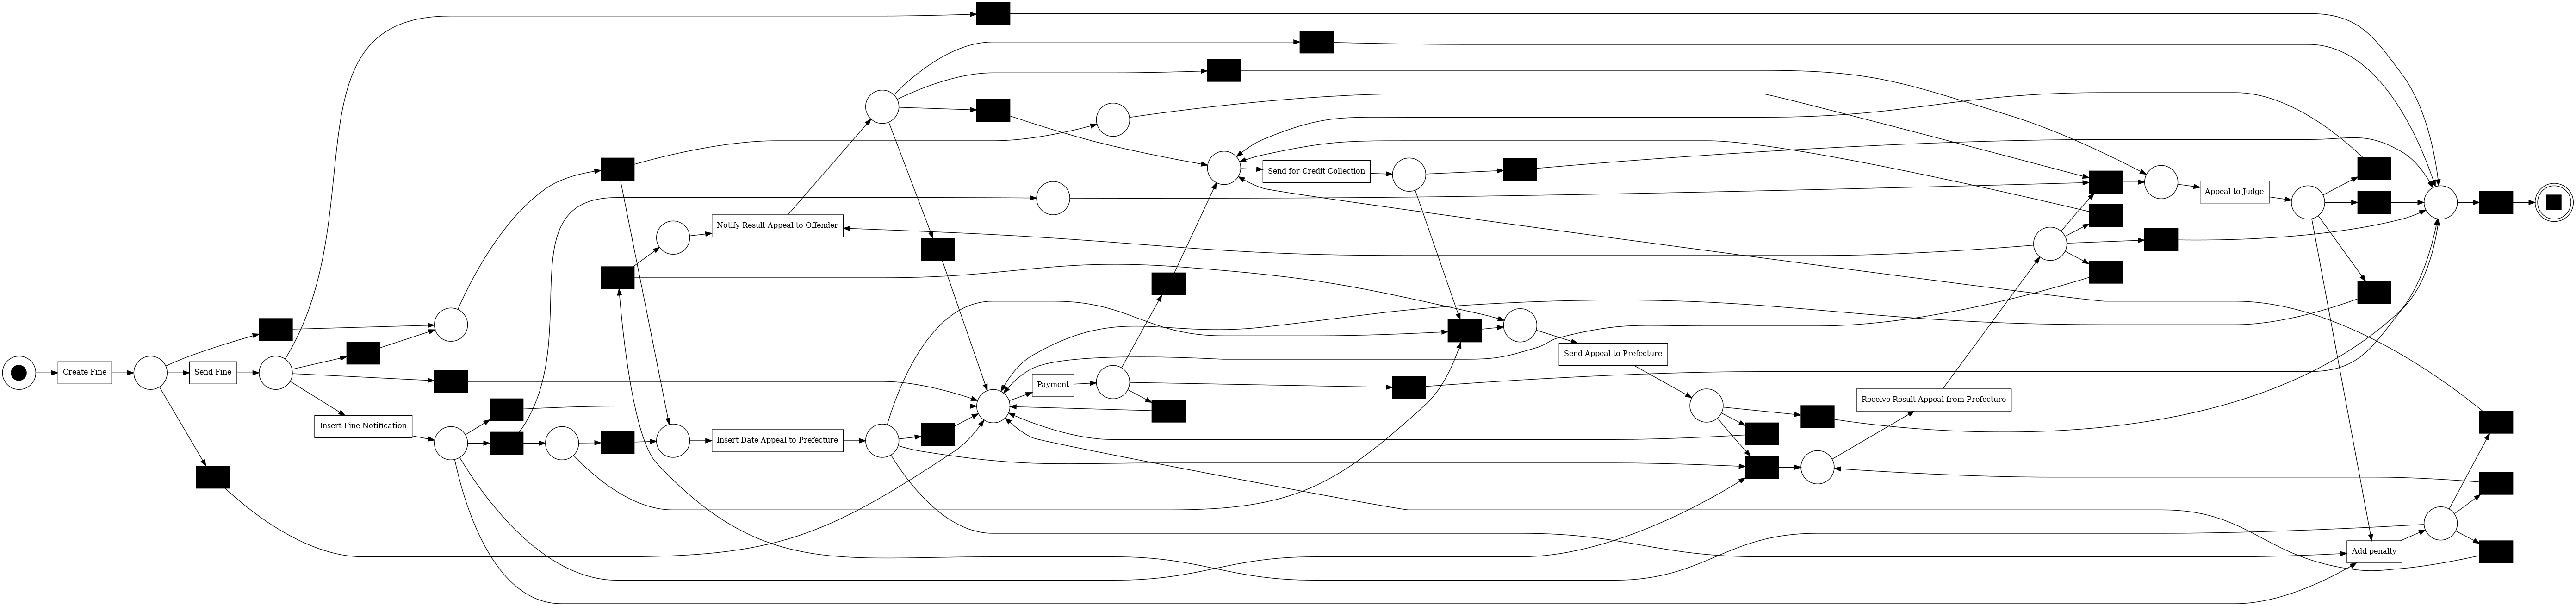

In [35]:
model_A_bpmn = pm4py.read_bpmn('./bpmn_models/Model_A.bpmn')
model_A_petri_net, initial_marking_A, final_marking_A = pm4py.convert_to_petri_net(model_A_bpmn)
pm4py.view_petri_net(model_A_petri_net, initial_marking_A, final_marking_A)
pm4py.write_pnml(model_A_petri_net, initial_marking_A, final_marking_A, 'teste.pnml')

model_B_bpmn = pm4py.read_bpmn('./bpmn_models/Model_B.bpmn')
model_B_petri_net, initial_marking_B, final_marking_B = pm4py.convert_to_petri_net(model_B_bpmn)

# 02. Conformidade
O objetivo da checagem de conformidade é indentificar semelhanças e discrepâncias entre o comportamento do modelo e no log de eventos. O algoritmo utilizado para esta análise foi o Token Replay.

### 02.1 Modelo A

Aplicando o token replay para todos os traces do modelo.

In [ ]:
replayed_traces_A = pm4py.conformance_diagnostics_token_based_replay(event_log, model_A_petri_net, initial_marking_A, final_marking_A)
replayed_traces_A = pd.DataFrame(replayed_traces_A)

Avaliando as métricas geradas pelo token replay.

In [5]:
num_fitting_traces_A = replayed_traces_A['trace_is_fit'].value_counts()[True]
percentage_fitting_traces_A = num_fitting_traces_A / len(replayed_traces_A)
global_trace_fitness_A = replayed_traces_A['trace_fitness'].mean()

all_metrics_A = {"Número de traces conformes" : num_fitting_traces_A, "Porcentagem de traces conformes": percentage_fitting_traces_A, "Conformidade": global_trace_fitness_A}
all_metrics_A = pd.DataFrame(all_metrics_A, index=["Modelo A"])
all_metrics_A

,Número de traces conformes,Porcentagem de traces conformes,Conformidade
Modelo A,69933,0.465073,0.947769


#### 02.1.1 Descobrindo Petri Net
Analisando a ede de petri gerada a partir da conversão do Modelo A (em BPMN), percebemos que a rede não está totalmente correta. Conseguimos analisar fazendo testes oculares de cases, ou pelas métricas calculadas anteriormente. 

Um modelo com todos os arcos possíveis estabelecidos pelo log deveria possuir conformidade total (valor igual a 1). Para confirmar novamente essa hipótese, podemos gerar diretamente uma rede de petri a partir do log com o algoritmo Inductive Miner e analisar sua conformidade.

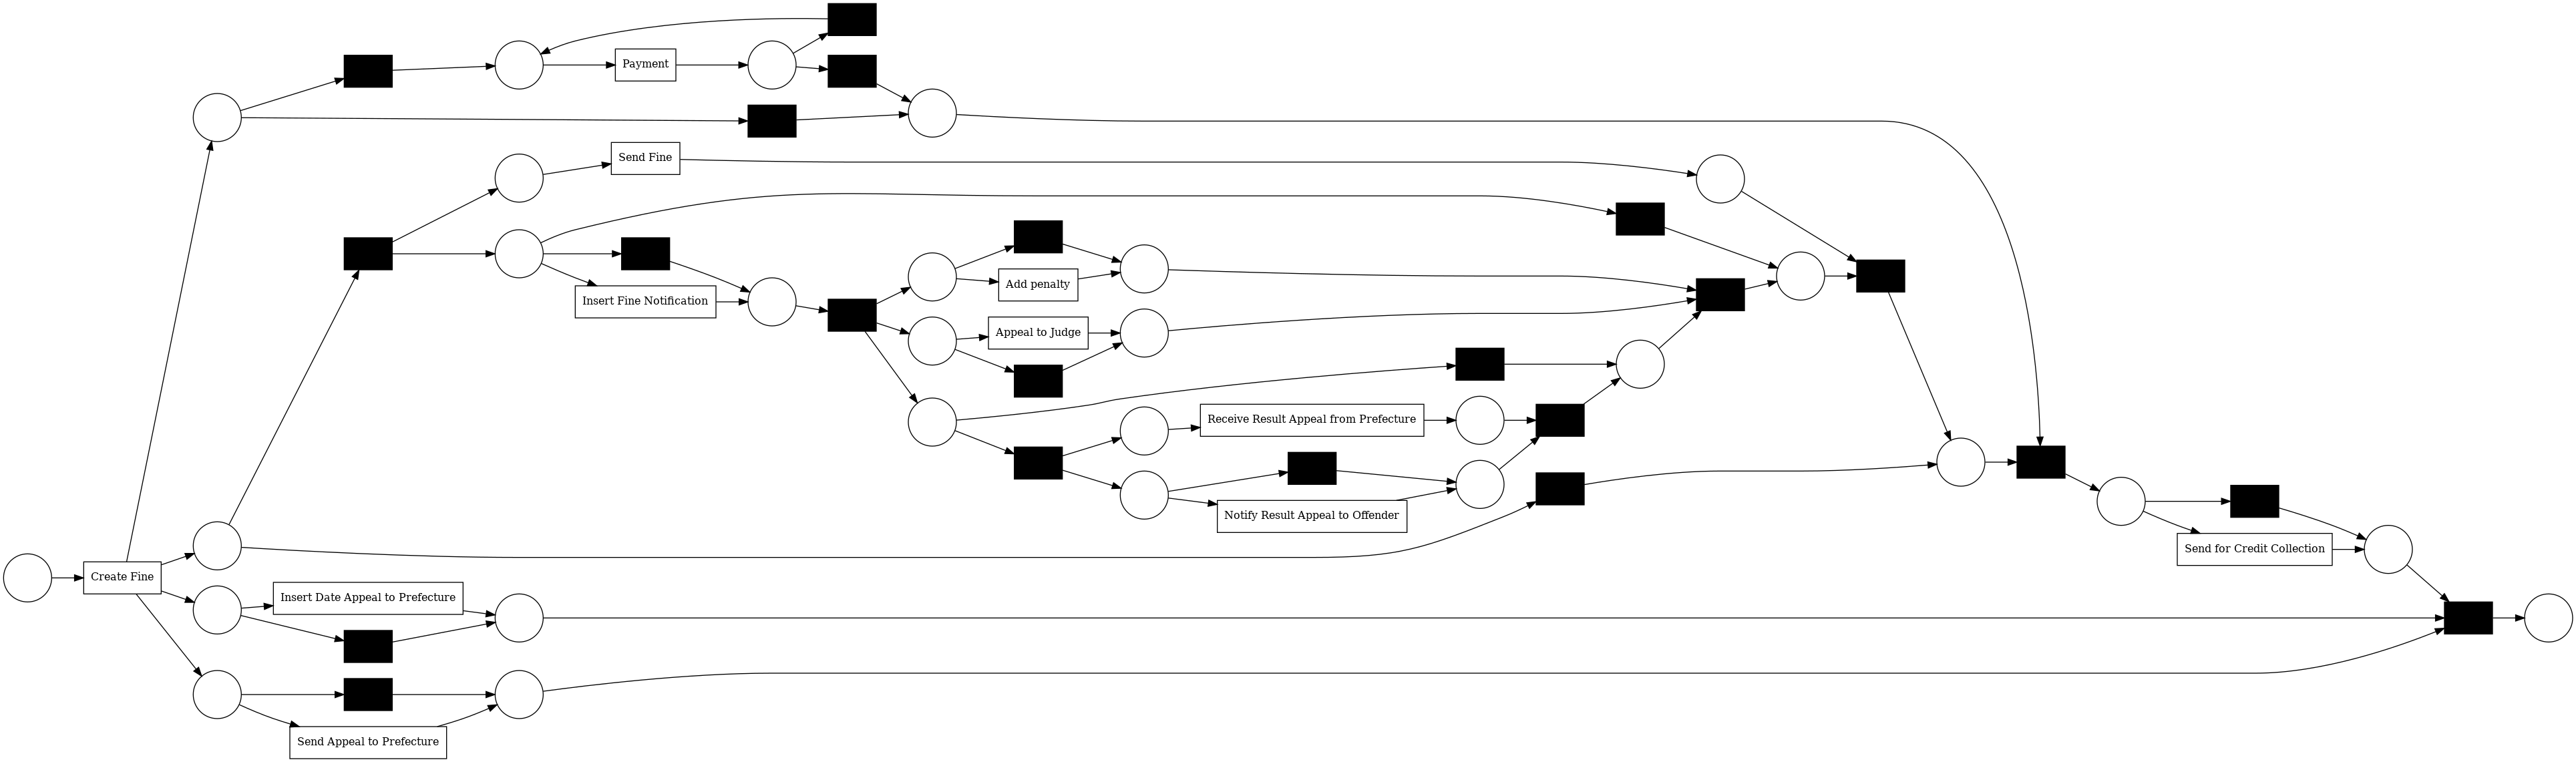

replaying log with TBR, completed variants ::   0%|          | 0/231 [00:00<?, ?it/s]

In [85]:
model_C_petri_net, initial_marking_C, final_marking_C = pm4py.discover_petri_net_inductive(event_log)
pm4py.view_petri_net(model_C_petri_net)
pm4py.write_pnml(model_C_petri_net, initial_marking_C, final_marking_C, './bpmn_models/Model_C.pnml')

replayed_traces_C = pm4py.conformance_diagnostics_token_based_replay(event_log, model_C_petri_net, initial_marking_C, final_marking_C)
replayed_traces_C = pd.DataFrame(replayed_traces_C)

In [82]:
num_fitting_traces_C = replayed_traces_C['trace_is_fit'].value_counts()[True]
percentage_fitting_traces_C = num_fitting_traces_C / len(replayed_traces_C)
global_trace_fitness_C = replayed_traces_C['trace_fitness'].mean()

all_metrics_C = {"Número de traces conformes" : num_fitting_traces_C, "Porcentagem de traces conformes": percentage_fitting_traces_C, "Conformidade": global_trace_fitness_C}
all_metrics_C = pd.DataFrame(all_metrics_C, index=["Modelo C"])
all_metrics_C

,Número de traces conformes,Porcentagem de traces conformes,Conformidade
Modelo C,150370,1.0,1.0


### 02.2 Modelo B

Aplicando o token replay para todos os traces do modelo.

In [ ]:
replayed_traces_B = pm4py.conformance_diagnostics_token_based_replay(event_log, model_B_petri_net, initial_marking_B, final_marking_B)
replayed_traces_B = pd.DataFrame(replayed_traces_B)

Avaliando as métricas geradas pelo token replay.

In [7]:
num_fitting_traces_B = replayed_traces_B['trace_is_fit'].value_counts()[True]
percentage_fitting_traces_B = num_fitting_traces_B / len(replayed_traces_B)
global_trace_fitness_B = replayed_traces_B['trace_fitness'].mean()

all_metrics_B = {"Número de traces conformes" : num_fitting_traces_B, "Porcentagem de traces conformes": percentage_fitting_traces_B, "Conformidade": global_trace_fitness_B}
all_metrics_B = pd.DataFrame(all_metrics_B, index=["Modelo B"])
all_metrics_B

,Número de traces conformes,Porcentagem de traces conformes,Conformidade
Modelo B,137027,0.911266,0.988175


# 03. Resumo
Nesta seção juntamos os resultados obtidos anteriormente a fim de compará-los.

In [83]:
all_metrics = pd.concat([all_metrics_A, all_metrics_B, all_metrics_C])
all_metrics

,Número de traces conformes,Porcentagem de traces conformes,Conformidade
Modelo A,69933,0.465073,0.947769
Modelo B,137027,0.911266,0.988175
Modelo C,150370,1.000000,1.000000


Podemos analisar pela tabela acima que a conformidade do Modelo B é consideravelmente maior que a do Modelo A. Ou seja, apesar de ser um modelo mais simples, uma maior quantidade de _cases_ (91.12%) é aceita perfeitamente pelo Modelo B.

Já pelo Modelo A, apenas (13.55%) dos _cases_ estão em conformidade com a Petri Net gerada.